In [1]:
import numpy as np



from ge.classify import read_node_label,Classifier

from ge import Struc2Vec

from sklearn.linear_model import LogisticRegression



import matplotlib.pyplot as plt

import networkx as nx

from sklearn.manifold import TSNE



def evaluate_embeddings(embeddings):

    X, Y = read_node_label('../data/flight/labels-brazil-airports.txt',skip_head=True)

    tr_frac = 0.8

    print("Training classifier using {:.2f}% nodes...".format(

        tr_frac * 100))

    clf = Classifier(embeddings=embeddings, clf=LogisticRegression())

    clf.split_train_evaluate(X, Y, tr_frac)





def plot_embeddings(embeddings,):

    X, Y = read_node_label('../data/flight/labels-brazil-airports.txt',skip_head=True)



    emb_list = []

    for k in X:

        emb_list.append(embeddings[k])

    emb_list = np.array(emb_list)



    model = TSNE(n_components=2)

    node_pos = model.fit_transform(emb_list)



    color_idx = {}

    for i in range(len(X)):

        color_idx.setdefault(Y[i][0], [])

        color_idx[Y[i][0]].append(i)



    for c, idx in color_idx.items():

        plt.scatter(node_pos[idx, 0], node_pos[idx, 1], label=c)  # c=node_colors)

    plt.legend()

    plt.show()

if __name__ == "__main__":
    G = nx.read_edgelist('../data/flight/brazil-airports.edgelist', create_using=nx.DiGraph(), nodetype=None,
                         data=[('weight', int)])

    model = Struc2Vec(G, 10, 80, workers=4, verbose=40, )
    model.train()
    embeddings = model.get_embeddings()

    evaluate_embeddings(embeddings)
    plot_embeddings(embeddings)

FileNotFoundError: [Errno 2] No such file or directory: '../data/flight/brazil-airports.edgelist'

In [6]:
from ge import Struc2Vec

In [ ]:
import networkx as nx

In [3]:
G = nx.read_edgelist('brazil-airports.edgelist',create_using=nx.DiGraph(),nodetype=None,data=[('weight',int)])#read graph

model = model = Struc2Vec(G, 10, 80, workers=4, verbose=40, ) #init model
model.train(window_size = 5, iter = 3)# train model
embeddings = model.get_embeddings()# get embedding vectors

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    4.5s remaining:    4.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    4.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1480s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished


Learning representation...
Learning representation done!


In [5]:
import pandas as pd

In [10]:
len(G.nodes)

131

In [13]:
pd.DataFrame(embeddings).T

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
7,0.309565,0.167020,0.153167,0.387317,0.913765,-0.205945,0.338719,-0.600418,-0.795642,0.229754,...,0.164405,0.439539,0.102323,0.153548,-0.196045,0.075380,-0.228380,-0.467782,0.408242,0.323962
77,0.401110,0.178215,0.423697,-0.335304,0.091712,-0.383099,-0.277051,-0.338782,0.079921,-0.102586,...,0.358483,0.139322,0.253444,-0.084263,-0.002348,-0.190791,0.014136,-0.195866,-0.218094,0.059630
29,0.151249,-0.059217,0.123410,-0.173356,-0.023650,0.036495,-0.304356,-0.200817,0.131383,0.113132,...,0.176958,-0.106569,0.070125,-0.071538,-0.059459,0.058039,-0.391770,-0.438231,-0.263465,-0.059770
50,-0.001431,-0.517507,0.156481,0.048063,0.015764,0.122055,-0.414689,0.021785,-0.017047,0.149350,...,0.288058,0.096149,0.259287,-0.000815,0.035564,0.062595,-0.352135,-0.298283,0.088017,-0.145823
3,0.076196,0.038868,0.084551,0.418494,0.657016,-0.106623,0.126238,-0.520017,-0.328908,0.135894,...,0.288504,0.323467,0.071181,0.283177,-0.383281,0.190566,-0.185621,-0.208285,0.353446,0.227638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,0.138189,-0.571148,0.183842,0.254758,0.147782,0.370521,-0.570040,0.025381,-0.097240,0.005309,...,-0.070346,-0.479768,-0.183931,0.244503,-0.484039,0.456172,-0.155882,0.311138,-0.724857,0.234918
109,0.130657,-0.580326,0.173186,0.272716,0.138997,0.395421,-0.568739,0.049513,-0.075818,0.005352,...,-0.074155,-0.475338,-0.172310,0.274665,-0.435273,0.402832,-0.129751,0.309893,-0.662475,0.243828
114,-0.070291,-0.859114,0.424628,-0.127705,0.129584,-0.767011,-0.093537,0.113422,-0.003310,-0.072597,...,-0.052426,-0.111545,-0.058397,0.201677,-0.203633,0.409430,-0.048570,0.133475,0.084777,-0.082499
12,0.072387,-0.599445,0.201158,0.252927,0.126028,0.373042,-0.552440,0.010238,-0.131067,-0.014036,...,-0.056157,-0.428263,-0.151742,0.258723,-0.439219,0.410109,-0.151898,0.370789,-0.628333,0.276239


In [14]:
import gensim

In [11]:
model = gensim.models.Word2Vec(G, sg=0, window=5, epochs =3, vector_size = 100,min_count=5,  workers=4)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    4.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1540s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished


Learning representation...
Learning representation done!
Training classifier using 80.00% nodes...
-------------------
{'micro': 0.6428571428571429, 'macro': 0.658008658008658, 'samples': 0.6428571428571429, 'weighted': 0.6091527520098949, 'acc': 0.6428571428571429}


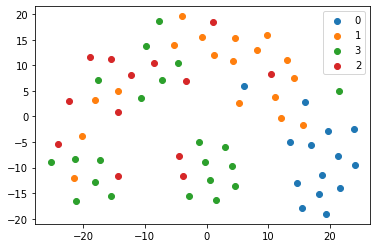

In [10]:
import numpy as np



from ge.classify import read_node_label,Classifier

from ge import Struc2Vec

from sklearn.linear_model import LogisticRegression



import matplotlib.pyplot as plt

import networkx as nx

from sklearn.manifold import TSNE



def evaluate_embeddings(embeddings):

    X, Y = read_node_label('labels-brazil-airports.txt',skip_head=True)

    tr_frac = 0.8

    print("Training classifier using {:.2f}% nodes...".format(

        tr_frac * 100))

    clf = Classifier(embeddings=embeddings, clf=LogisticRegression())

    clf.split_train_evaluate(X, Y, tr_frac)





def plot_embeddings(embeddings,):

    X, Y = read_node_label('labels-brazil-airports.txt',skip_head=True)



    emb_list = []

    for k in X:

        emb_list.append(embeddings[k])

    emb_list = np.array(emb_list)



    model = TSNE(n_components=2)

    node_pos = model.fit_transform(emb_list)



    color_idx = {}

    for i in range(len(X)):

        color_idx.setdefault(Y[i][0], [])

        color_idx[Y[i][0]].append(i)



    for c, idx in color_idx.items():

        plt.scatter(node_pos[idx, 0], node_pos[idx, 1], label=c)  # c=node_colors)

    plt.legend()

    plt.show()

if __name__ == "__main__":
    G = nx.read_edgelist('brazil-airports.edgelist', create_using=nx.DiGraph(), nodetype=None,
                         data=[('weight', int)])

    model = Struc2Vec(G, 10, 80, workers=4, verbose=40, )
    model.train(embed_size=32,window_size=9)
    embeddings = model.get_embeddings()

    evaluate_embeddings(embeddings)
    plot_embeddings(embeddings)


In [11]:
embeddings

{'7': array([ 0.2487855 ,  0.3423631 ,  0.46875226,  0.19718915, -1.2324438 ,
         0.01351019, -0.87984407,  0.14824101, -1.1768016 ,  1.2788444 ,
        -0.5173062 , -0.150269  ,  0.42300397, -0.8594041 , -1.0940725 ,
         0.09697411,  0.5570523 , -0.5507722 ,  0.6287372 , -0.6699901 ,
         1.4872001 ,  0.8991192 ,  1.1217134 ,  0.04321399,  0.5459308 ,
         1.1250732 , -0.5844465 ,  0.5319388 ,  0.21006681, -0.4816251 ,
         1.3259825 ,  0.26900244], dtype=float32),
 '77': array([ 0.13051955, -0.02090741,  0.36727208, -0.78167236, -0.8306362 ,
         0.76442623,  0.52784646,  0.09338514,  0.12162924,  0.24039851,
         0.2376698 , -0.43441263, -0.89862543, -0.9720032 ,  0.43115756,
        -0.10213208,  0.9077614 , -0.01249813, -0.41904697,  0.58968896,
         0.8770839 ,  0.98030084,  0.7349356 ,  0.24245764,  0.07115272,
         0.15890276, -1.018012  ,  0.61452043,  0.46279874, -0.73249024,
        -0.0909972 , -0.4639275 ], dtype=float32),
 '29': arra

Preprocess transition probs...
Learning embedding vectors...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Learning embedding vectors done!
Training classifier using 80.00% nodes...
-------------------
{'micro': 0.2857142857142857, 'macro': 0.2777777777777778, 'samples': 0.2857142857142857, 'weighted': 0.22222222222222224, 'acc': 0.2857142857142857}


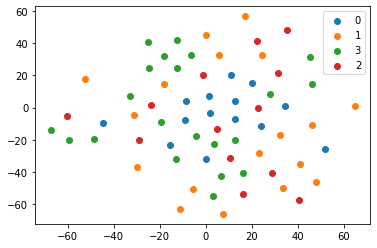

In [6]:
from ge.classify import read_node_label,Classifier

from ge import Node2Vec

from sklearn.linear_model import LogisticRegression



import matplotlib.pyplot as plt

import networkx as nx

from sklearn.manifold import TSNE



def evaluate_embeddings(embeddings):

    X, Y = read_node_label('labels-brazil-airports.txt',skip_head=True)

    tr_frac = 0.8

    print("Training classifier using {:.2f}% nodes...".format(

        tr_frac * 100))

    clf = Classifier(embeddings=embeddings, clf=LogisticRegression())

    clf.split_train_evaluate(X, Y, tr_frac)





def plot_embeddings(embeddings,):

    X, Y = read_node_label('labels-brazil-airports.txt',skip_head=True)



    emb_list = []

    for k in X:

        emb_list.append(embeddings[k])

    emb_list = np.array(emb_list)



    model = TSNE(n_components=2)

    node_pos = model.fit_transform(emb_list)



    color_idx = {}

    for i in range(len(X)):

        color_idx.setdefault(Y[i][0], [])

        color_idx[Y[i][0]].append(i)



    for c, idx in color_idx.items():

        plt.scatter(node_pos[idx, 0], node_pos[idx, 1], label=c)  # c=node_colors)

    plt.legend()

    plt.show()

if __name__ == "__main__":
    G = nx.read_edgelist('brazil-airports.edgelist', create_using=nx.DiGraph(), nodetype=None,
                         data=[('weight', int)])

    model = Node2Vec(G, 10, 80, workers=1, p=0.25, q=2, use_rejection_sampling=0)
    model.train(embed_size=16)
    embeddings = model.get_embeddings()

    evaluate_embeddings(embeddings)
    plot_embeddings(embeddings)


In [38]:
def evaluate_embeddings(embeddings):

    X, Y = read_node_label('xx.txt',skip_head=True)

    tr_frac = 0.8

    print("Training classifier using {:.2f}% nodes...".format(

        tr_frac * 100))

    clf = Classifier(embeddings=embeddings, clf=LogisticRegression())

    clf.split_train_evaluate(X, Y, tr_frac)





def plot_embeddings(embeddings,):

    X, Y = read_node_label('xx.txt',skip_head=True)



    emb_list = []

    for k in X:

        emb_list.append(embeddings[k])

    emb_list = np.array(emb_list)



    model = TSNE(n_components=2)

    node_pos = model.fit_transform(emb_list)



    color_idx = {}

    for i in range(len(X)):

        color_idx.setdefault(Y[i][0], [])

        color_idx[Y[i][0]].append(i)



    for c, idx in color_idx.items():

        plt.scatter(node_pos[idx, 0], node_pos[idx, 1], label=c)  # c=node_colors)

    plt.legend()

    plt.show()

In [3]:
import pandas as pd

In [4]:
gg = pd.DataFrame({'a':['1','2','3','5','10','11','33'],'b':['tt','g','f','t','s','g','i']},index=[0,1,2,3,4,5,6])
dg = nx.from_pandas_edgelist(gg,'a','b')
dg.edges

EdgeView([('1', 'tt'), ('2', 'g'), ('g', '11'), ('3', 'f'), ('5', 't'), ('10', 's'), ('33', 'i')])

In [5]:
dg.nodes

NodeView(('1', 'tt', '2', 'g', '3', 'f', '5', 't', '10', 's', '11', '33', 'i'))

In [9]:
model = Struc2Vec(dg, 10, 80, workers=1, verbose=40, )
model.train(embed_size=32,window_size=9)

Learning representation...
Learning representation done!


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [19]:
gg['a']

0     1
1     2
2     3
3     5
4    10
5    11
6    33
Name: a, dtype: object

In [26]:
c=[]
for i in gg['a']:
    c.append(embeddings[i])

In [28]:
pd.DataFrame(c)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.082005,-0.367336,0.028344,0.299424,-0.029108,-0.044117,0.396107,0.202350,0.012644,0.101392,...,0.451742,-0.343980,0.175691,0.035148,-0.090583,-0.102282,-0.034929,-0.150961,-0.244625,-0.094840
1,-0.064682,-0.304040,0.090830,0.346051,-0.108767,-0.104107,0.482396,0.250461,-0.015594,0.068499,...,0.468845,-0.291647,0.204126,-0.048278,-0.044298,-0.024615,-0.035021,-0.161014,-0.290254,-0.048061
2,-0.085120,-0.332220,0.084949,0.291289,-0.059266,-0.062500,0.460868,0.205356,0.023011,0.113238,...,0.480890,-0.376867,0.170082,0.009660,-0.068798,-0.051662,0.013845,-0.123415,-0.250163,-0.050436
3,-0.038347,-0.356658,0.039760,0.281276,-0.019648,-0.064860,0.426522,0.168294,-0.029607,0.108108,...,0.467666,-0.343514,0.178747,-0.027806,-0.072822,-0.044749,-0.016161,-0.141093,-0.252314,-0.098231
4,-0.061898,-0.364222,0.078970,0.315986,-0.079500,-0.033434,0.464618,0.171107,-0.021613,0.091807,...,0.452549,-0.350484,0.158468,-0.007655,-0.065750,-0.084845,-0.038468,-0.166315,-0.271322,-0.095366
5,-0.014020,-0.283331,0.040895,0.335662,-0.021324,-0.096725,0.471184,0.243338,0.035606,0.069931,...,0.479608,-0.250595,0.191122,-0.055326,0.007988,-0.049358,0.029884,-0.166869,-0.288089,0.001515
6,-0.117671,-0.387177,0.030320,0.301799,-0.049827,-0.020477,0.475011,0.185078,-0.000032,0.117863,...,0.446099,-0.361091,0.156643,0.010923,-0.089536,-0.069523,-0.028098,-0.124872,-0.238057,-0.070104


In [50]:
embeddings.

{'1': array([-0.08200455, -0.3673362 ,  0.02834399,  0.2994242 , -0.02910792,
        -0.0441171 ,  0.3961075 ,  0.20235023,  0.01264426,  0.10139175,
         0.17067163, -0.06868044,  0.09507148,  0.11769601, -0.22228828,
        -0.00640632, -0.16210362,  0.20862041, -0.08233155,  0.25045237,
         0.2953528 ,  0.39686078,  0.45174196, -0.34398007,  0.17569108,
         0.03514833, -0.090583  , -0.10228235, -0.03492926, -0.15096095,
        -0.24462488, -0.09483963], dtype=float32),
 'tt': array([-0.11670024, -0.36862913,  0.04588643,  0.31746453, -0.0796048 ,
        -0.03603418,  0.45078778,  0.21509543,  0.02754048,  0.07464069,
         0.20385641, -0.04111527,  0.0603389 ,  0.08051275, -0.2201126 ,
        -0.03985977, -0.15314342,  0.22127518, -0.06688591,  0.28005373,
         0.30015624,  0.42729172,  0.42610443, -0.3321088 ,  0.17377953,
        -0.01477143, -0.04441857, -0.10929941,  0.00266051, -0.13110688,
        -0.25980097, -0.05993358], dtype=float32),
 '2': array

In [ ]:
#用这个函数来把label转化成txt文件
file.to_csv('threecolumn.txt',sep='\t',index=False)